# LOADING MODULES AND DATA SETS

In [2]:
import pandas as pd
import numpy as np
import math
import re

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, KFold , GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgbs
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
data_train = r'/Users/Humza Ali/Documents/Data/Machine Learning/Project 4/Hazard_train.csv'
hd_train = pd.read_csv(data_train)

In [4]:
hd_train.head()

,Id,Hazard,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,...,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
0,83642,2,10,23,4,N,K,Y,B,D,...,2,37,1,11,2,Y,N,E,2,1
1,92530,6,3,18,2,B,H,N,B,B,...,2,34,1,12,7,Y,N,C,3,3
2,86131,4,5,20,4,B,K,N,B,B,...,1,40,1,17,4,Y,N,D,1,1
3,88666,1,4,7,5,N,H,N,B,B,...,2,37,1,11,6,Y,N,D,2,1
4,11122,21,10,21,6,N,C,Y,B,C,...,2,40,1,6,6,N,N,D,5,5


In [5]:
data_test = r'/Users/Humza Ali/Documents/Data/Machine Learning/Project 4/Hazard_test_share.csv'
hd_test = pd.read_csv(data_test)

In [6]:
hd_test.head()

,Id,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,T1_V9,...,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
0,67943,9,18,2,N,B,Y,B,C,D,...,2,34,1,14,4,Y,N,E,3,3
1,38287,12,20,5,N,C,Y,D,B,D,...,1,40,1,9,3,Y,N,E,1,1
2,51951,14,18,1,N,K,Y,B,D,E,...,2,25,1,1,4,Y,N,E,2,1
3,40476,19,16,1,W,H,Y,B,B,D,...,2,25,1,1,7,Y,N,D,2,11
4,101190,12,21,2,B,K,Y,B,B,E,...,2,22,1,20,6,Y,N,C,2,1


# BIVARIATE ANALYSIS AND FEATURE ENGINEERING (EDA)

In [7]:
hd_train.shape,hd_test.shape

((40799, 34), (10200, 33))

In [8]:
hd_train.dtypes

Id         int64
Hazard     int64
T1_V1      int64
T1_V2      int64
T1_V3      int64
T1_V4     object
T1_V5     object
T1_V6     object
T1_V7     object
T1_V8     object
T1_V9     object
T1_V10     int64
T1_V11    object
T1_V12    object
T1_V13     int64
T1_V14     int64
T1_V15    object
T1_V16    object
T1_V17    object
T2_V1      int64
T2_V2      int64
T2_V3     object
T2_V4      int64
T2_V5     object
T2_V6      int64
T2_V7      int64
T2_V8      int64
T2_V9      int64
T2_V10     int64
T2_V11    object
T2_V12    object
T2_V13    object
T2_V14     int64
T2_V15     int64
dtype: object

In [9]:
hd_train.nunique()

Id        40799
Hazard       49
T1_V1        19
T1_V2        24
T1_V3         9
T1_V4         8
T1_V5        10
T1_V6         2
T1_V7         4
T1_V8         4
T1_V9         6
T1_V10        5
T1_V11       12
T1_V12        4
T1_V13        4
T1_V14        5
T1_V15        8
T1_V16       18
T1_V17        2
T2_V1       100
T2_V2        39
T2_V3         2
T2_V4        22
T2_V5         6
T2_V6         7
T2_V7         7
T2_V8         3
T2_V9        25
T2_V10        7
T2_V11        2
T2_V12        2
T2_V13        5
T2_V14        7
T2_V15       12
dtype: int64

In [10]:
hd_train["Hazard"].value_counts()

1     15229
4      6561
2      4939
5      2902
7      2651
3      1632
8      1434
6      1114
10     1048
11      633
9       594
13      442
12      311
14      304
16      183
17      154
15      142
19      111
18       90
20       71
22       53
25       34
23       31
28       27
21       20
26       20
29       12
24       11
34        6
31        5
30        5
27        4
32        4
38        2
37        2
41        2
40        2
42        2
46        2
64        1
33        1
63        1
35        1
69        1
39        1
49        1
51        1
52        1
44        1
Name: Hazard, dtype: int64

In [11]:
hd_train.isnull().sum()

Id        0
Hazard    0
T1_V1     0
T1_V2     0
T1_V3     0
T1_V4     0
T1_V5     0
T1_V6     0
T1_V7     0
T1_V8     0
T1_V9     0
T1_V10    0
T1_V11    0
T1_V12    0
T1_V13    0
T1_V14    0
T1_V15    0
T1_V16    0
T1_V17    0
T2_V1     0
T2_V2     0
T2_V3     0
T2_V4     0
T2_V5     0
T2_V6     0
T2_V7     0
T2_V8     0
T2_V9     0
T2_V10    0
T2_V11    0
T2_V12    0
T2_V13    0
T2_V14    0
T2_V15    0
dtype: int64

In [12]:
hd_test.isnull().sum()

Id        0
T1_V1     0
T1_V2     0
T1_V3     0
T1_V4     0
T1_V5     0
T1_V6     0
T1_V7     0
T1_V8     0
T1_V9     0
T1_V10    0
T1_V11    0
T1_V12    0
T1_V13    0
T1_V14    0
T1_V15    0
T1_V16    0
T1_V17    0
T2_V1     0
T2_V2     0
T2_V3     0
T2_V4     0
T2_V5     0
T2_V6     0
T2_V7     0
T2_V8     0
T2_V9     0
T2_V10    0
T2_V11    0
T2_V12    0
T2_V13    0
T2_V14    0
T2_V15    0
dtype: int64

In [13]:
hd_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40799 entries, 0 to 40798
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      40799 non-null  int64 
 1   Hazard  40799 non-null  int64 
 2   T1_V1   40799 non-null  int64 
 3   T1_V2   40799 non-null  int64 
 4   T1_V3   40799 non-null  int64 
 5   T1_V4   40799 non-null  object
 6   T1_V5   40799 non-null  object
 7   T1_V6   40799 non-null  object
 8   T1_V7   40799 non-null  object
 9   T1_V8   40799 non-null  object
 10  T1_V9   40799 non-null  object
 11  T1_V10  40799 non-null  int64 
 12  T1_V11  40799 non-null  object
 13  T1_V12  40799 non-null  object
 14  T1_V13  40799 non-null  int64 
 15  T1_V14  40799 non-null  int64 
 16  T1_V15  40799 non-null  object
 17  T1_V16  40799 non-null  object
 18  T1_V17  40799 non-null  object
 19  T2_V1   40799 non-null  int64 
 20  T2_V2   40799 non-null  int64 
 21  T2_V3   40799 non-null  object
 22  T2_V4   40799 non-null

In [14]:
hd_train.describe()

,Id,Hazard,T1_V1,T1_V2,T1_V3,T1_V10,T1_V13,T1_V14,T2_V1,T2_V2,T2_V4,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V14,T2_V15
count,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000
mean,50850.454276,4.009584,9.723645,12.849359,3.190691,7.025123,14.009902,1.582416,57.568641,12.410451,10.251403,1.947499,33.504620,1.031349,12.496973,4.489963,2.448344,3.482512
std,29282.641037,4.007785,5.170715,6.257502,1.742044,3.596619,4.649012,0.865121,23.461468,4.785406,4.845443,0.795249,5.830512,0.191676,7.313552,1.899386,1.257293,3.070911
min,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,5.000000,0.000000,1.000000,1.000000,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25596.500000,1.000000,6.000000,7.000000,2.000000,3.000000,10.000000,1.000000,40.000000,9.000000,6.000000,2.000000,31.000000,1.000000,6.000000,3.000000,2.000000,1.000000
50%,50784.000000,3.000000,9.000000,14.000000,3.000000,8.000000,15.000000,1.000000,55.000000,11.000000,10.000000,2.000000,34.000000,1.000000,14.000000,4.000000,2.000000,2.000000
75%,76198.500000,5.000000,14.000000,18.000000,4.000000,12.000000,20.000000,2.000000,77.000000,15.000000,14.000000,2.000000,40.000000,1.000000,18.000000,6.000000,3.000000,5.000000
max,101999.000000,69.000000,19.000000,24.000000,9.000000,12.000000,20.000000,4.000000,100.000000,39.000000,22.000000,7.000000,40.000000,3.000000,25.000000,7.000000,7.000000,12.000000


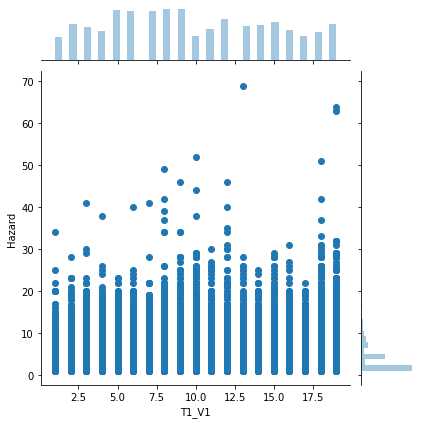

In [15]:
sns.jointplot(x = 'T1_V1',y = 'Hazard', data = hd_train)

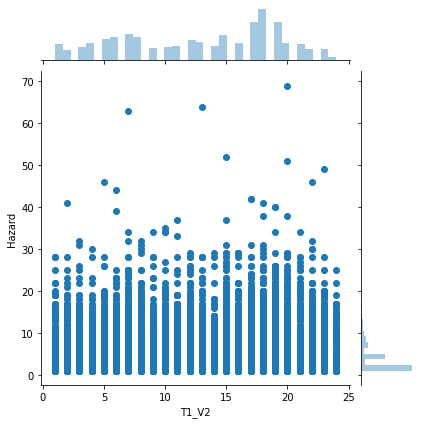

In [16]:
sns.jointplot(x = 'T1_V2',y = 'Hazard', data = hd_train)

# TRAIN TEST SPLIT

In [17]:
x_train,x_test = train_test_split(hd_train,test_size = 0.2,random_state = 1)

In [18]:
x_train1 = x_train.drop(['Hazard','Id'],1)
y_train1 = x_train['Hazard']
x_test1 = x_test.drop(['Hazard','Id'],1)
y_test1 = x_test['Hazard']

In [19]:
x_train1.shape,y_train1.shape

((32639, 32), (32639,))

In [20]:
x_test1.shape,y_test1.shape

((8160, 32), (8160,))

# MODEL TRANSFORMER AND PIPELINE

In [21]:
num_col = x_train1.select_dtypes(np.number).columns

In [22]:
char_col = x_train1.select_dtypes(object).columns

In [23]:
num_col,char_col

(Index(['T1_V1', 'T1_V2', 'T1_V3', 'T1_V10', 'T1_V13', 'T1_V14', 'T2_V1',
        'T2_V2', 'T2_V4', 'T2_V6', 'T2_V7', 'T2_V8', 'T2_V9', 'T2_V10',
        'T2_V14', 'T2_V15'],
       dtype='object'),
 Index(['T1_V4', 'T1_V5', 'T1_V6', 'T1_V7', 'T1_V8', 'T1_V9', 'T1_V11',
        'T1_V12', 'T1_V15', 'T1_V16', 'T1_V17', 'T2_V3', 'T2_V5', 'T2_V11',
        'T2_V12', 'T2_V13'],
       dtype='object'))

In [24]:
pipe_num=make_pipeline(SimpleImputer(strategy="median"),StandardScaler())
pipe_col=make_pipeline(OneHotEncoder(handle_unknown="ignore"))

In [25]:
ctrans=make_column_transformer((pipe_num,num_col),(pipe_col,char_col))

In [26]:
ctrans.fit_transform(x_train1)

<32639x111 sparse matrix of type '<class 'numpy.float64'>'
	with 1044448 stored elements in Compressed Sparse Row format>

In [27]:
ctrans.transform(hd_test)

C:\Users\Humza Ali\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


<10200x111 sparse matrix of type '<class 'numpy.float64'>'
	with 326400 stored elements in Compressed Sparse Row format>

# LINEAR REGRESSION

In [28]:
lm = LinearRegression()

In [29]:
pipe = make_pipeline(ctrans,lm)

In [30]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['T1_V1', 'T1_V2', 'T1_V3', 'T1_V10', 'T1_V13', 'T1_V14', 'T2_V1',
       'T2_V2', 'T2_V4', 'T2_V6', 'T2_V7', 'T2_V8', 'T2_V9', 'T2_V10',
       'T2_V14', 'T2_V15'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                   

In [31]:
pipe.fit(x_train1,y_train1)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['T1_V1', 'T1_V2', 'T1_V3', 'T1_V10', 'T1_V13', 'T1_V14', 'T2_V1',
       'T2_V2', 'T2_V4', 'T2_V6', 'T2_V7', 'T2_V8', 'T2_V9', 'T2_V10',
       'T2_V14', 'T2_V15'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                   

In [32]:
pred_train=pipe.predict(x_train1)
pred_test=pipe.predict(x_test1)

In [33]:
pred_test,pred_train

(array([5.06784045, 2.89983472, 3.34962527, ..., 7.58674434, 4.27935527,
        2.39904435]),
 array([6.23704224, 3.70555504, 3.6479099 , ..., 3.52620661, 1.02026184,
        4.37907749]))

In [34]:
mean_absolute_error(y_test1,pred_test)

2.7302169140614794

In [36]:
Score = 1-(mean_absolute_error(y_test1,pred_test)/5.4)

In [37]:
Score 

0.49440427517380015

In [38]:
# Since the score is less than 0.5 for grading purpose we will use different algorithm for appropriate scoring

# Xg Boost

In [39]:
strings="xgb__"
parameters = {
    'max_depth':range(2,10,1),
    'n_estimators': [40,60,100,150],
    'learning_rate': [0.1, 0.01,0.05], #shrinkage.. reduces overfitting
    'reg_lambda':[0.1,0.01,1,10],
    'reg_alpha':[0.1,0.01,1,10],
}

In [40]:
parameters.items()

dict_items([('max_depth', range(2, 10)), ('n_estimators', [40, 60, 100, 150]), ('learning_rate', [0.1, 0.01, 0.05]), ('reg_lambda', [0.1, 0.01, 1, 10]), ('reg_alpha', [0.1, 0.01, 1, 10])])

In [41]:
xgb_params={strings+k:v for k,v in parameters.items()}
xgb_params

{'xgb__max_depth': range(2, 10),
 'xgb__n_estimators': [40, 60, 100, 150],
 'xgb__learning_rate': [0.1, 0.01, 0.05],
 'xgb__reg_lambda': [0.1, 0.01, 1, 10],
 'xgb__reg_alpha': [0.1, 0.01, 1, 10]}

In [42]:
xgb=xgbs.XGBRegressor()
pipe=Pipeline([("columntransfer",ctrans),("xgb",xgb)])

In [44]:
grid = RandomizedSearchCV(pipe,xgb_params,cv = 5,scoring = 'neg_mean_absolute_error')

In [45]:
grid

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransfer',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               Index(['T1_V1', 'T1_V2', 'T1_V3', 'T1_V10', 'T1_V13', 'T1_V14', 'T2_V1',
       'T2_V2', 'T2_V4', 'T2_V6', 'T2_V7', 'T2_V8', 'T2_V9', 'T2_V10',
       'T2_V14'...
       'T1_V12', 'T1_V15', 'T1_V16', 'T1_V17', 'T2_V3', 'T2_V5', 'T2_V11',
       'T2_V12', 'T2_V13']

In [46]:
grid.fit(x_train1,y_train1);

[17:31:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:31:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:31:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:31:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:32:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:32:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:32:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:32:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:32:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [47]:
grid.predict(x_train1)

array([5.4607224, 2.889956 , 2.950009 , ..., 3.4036121, 2.672999 ,
       3.8724172], dtype=float32)

In [48]:
mea = mean_absolute_error(y_test1,grid.predict(x_test1))

In [49]:
mea

2.677933280023874

In [50]:
Score = 1-(mea/5.4)

In [51]:
Score

0.5040864296252086

In [53]:
final_pred = grid.predict(hd_test)

C:\Users\Humza Ali\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


In [54]:
final_pred

array([5.9008904, 3.3729324, 5.730663 , ..., 3.3108447, 3.3392053,
       2.8847983], dtype=float32)

In [55]:
submission=pd.DataFrame(data=final_pred)

In [56]:
submission.astype(int).head()

,0
0,5
1,3
2,5
3,4
4,3


In [57]:
submission.head()

,0
0,5.900890
1,3.372932
2,5.730663
3,4.013642
4,3.877999


In [58]:
submission.columns=["Hazard"]

In [59]:
submission.shape

(10200, 1)

In [60]:
hd_test.shape

(10200, 33)

In [61]:
submission=submission.to_csv("Abdeali_Project4.csv",index=False)

# QUIZ

In [68]:
import statistics

In [69]:
a = hd_train["T1_V5"]

In [71]:
print(statistics.mode(a)) # for question no 2 Quiz

K


In [74]:
round(hd_train.groupby("T2_V13")["Hazard"].median(),2) #For question no 3 Quiz

T2_V13
A    2
B    4
C    3
D    3
E    2
Name: Hazard, dtype: int64

In [77]:
hd_train.nunique().sort_values() #for question no 4 quiz

T2_V12        2
T2_V11        2
T1_V17        2
T1_V6         2
T2_V3         2
T2_V8         3
T1_V7         4
T1_V8         4
T1_V13        4
T1_V12        4
T1_V10        5
T2_V13        5
T1_V14        5
T2_V5         6
T1_V9         6
T2_V14        7
T2_V7         7
T2_V6         7
T2_V10        7
T1_V4         8
T1_V15        8
T1_V3         9
T1_V5        10
T2_V15       12
T1_V11       12
T1_V16       18
T1_V1        19
T2_V4        22
T1_V2        24
T2_V9        25
T2_V2        39
Hazard       49
T2_V1       100
Id        40799
dtype: int64

In [78]:
hd_train['T1_V11'].value_counts() #For question no 5 quiz

B    13694
H    12313
L     5590
J     4961
A     1257
I     1073
F      427
M      417
E      352
N      333
D      200
K      182
Name: T1_V11, dtype: int64

In [79]:
hd_train.select_dtypes(object).nunique().sort_values() # For Question no 6

T1_V6      2
T1_V17     2
T2_V3      2
T2_V11     2
T2_V12     2
T1_V7      4
T1_V8      4
T1_V12     4
T2_V13     5
T1_V9      6
T2_V5      6
T1_V4      8
T1_V15     8
T1_V5     10
T1_V11    12
T1_V16    18
dtype: int64

In [80]:
hd_train["Hazard"].describe()

count    40799.000000
mean         4.009584
std          4.007785
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max         69.000000
Name: Hazard, dtype: float64

In [82]:
#IQR = Q3 - Q1 
IQR = 5.00000 - 1.000000    # For Question no 7 quiz
IQR                              

4.0

In [ ]:
#Q1.What kind of predictive problem you are going to solve in this project
#Ans. Regression

#Q2. What is the mode of variable T1_V5 ?
# Ans. K

#Q3. Which category of T2_V13 has highest median hazard ?
#Ans. B

#Q4. Which variable has higher number of unique values [ except Id and Hazard ]?
#Ans. T2_V1

#Q5. How many categories in T1_V11 have frequency less than 500 
#Ans. 6

#Q6. which categorical variable has highest number of categories ?
#Ans. T1_V16

#Q7. what is the inter quartile range of hazard?
#Ans. 4.0

#Q8. How many missing values are there in the data ? 
#Ans . 0

#Q9. Which one of these penalties results in model reduction?
#Ans. L1

#Q10. Which one of these overfits the data?
#Ans. Decision Trees